In [3]:
#!pip install sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv('Chess games stats.csv')
df.dropna(inplace = True) #removes empty lines

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18637 entries, 0 to 18636
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      18637 non-null  int64 
 1   Game ID                         18637 non-null  object
 2   White Rating                    18637 non-null  int64 
 3   Black Rating                    18637 non-null  int64 
 4   Opening ECO                     18637 non-null  object
 5   Opening Ply                     18637 non-null  int64 
 6   White Centi-pawn Loss           18637 non-null  int64 
 7   White's Number of Inaccuracies  18637 non-null  int64 
 8   White's Number of Mistakes      18637 non-null  int64 
 9   White's Number of Blunders      18637 non-null  int64 
 10  Black Centi-pawn Loss           18637 non-null  int64 
 11  Black's Number of Inaccuracies  18637 non-null  int64 
 12  Black's Number of Mistakes      18637 non-null

In [4]:
df.describe()
#white's average pawn loss is lower than blacks - black is harder to play correctly


,Unnamed: 0,White Rating,Black Rating,Opening Ply,White Centi-pawn Loss,White's Number of Inaccuracies,White's Number of Mistakes,White's Number of Blunders,Black Centi-pawn Loss,Black's Number of Inaccuracies,Black's Number of Mistakes,Black's Number of Blunders
count,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000,18637.000000
mean,9318.000000,1774.528519,1776.729678,5.319043,58.814294,3.258947,1.325643,2.115738,60.778451,3.283254,1.332242,2.118206
std,5380.182819,314.840181,317.424527,3.058254,36.622111,2.404746,1.390271,2.078614,38.316602,2.420974,1.383967,2.094702
min,0.000000,784.000000,780.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4659.000000,1551.000000,1552.000000,3.000000,33.000000,1.000000,0.000000,1.000000,33.000000,1.000000,0.000000,1.000000
50%,9318.000000,1782.000000,1781.000000,5.000000,53.000000,3.000000,1.000000,2.000000,55.000000,3.000000,1.000000,2.000000
75%,13977.000000,1991.000000,1996.000000,7.000000,77.000000,5.000000,2.000000,3.000000,80.000000,5.000000,2.000000,3.000000
max,18636.000000,2997.000000,2995.000000,28.000000,517.000000,19.000000,12.000000,18.000000,550.000000,22.000000,12.000000,22.000000


In [4]:
#changes all to int
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for col in df.columns:
    df[col] = enc.fit(df[col]).transform(df[col])

<AxesSubplot:>

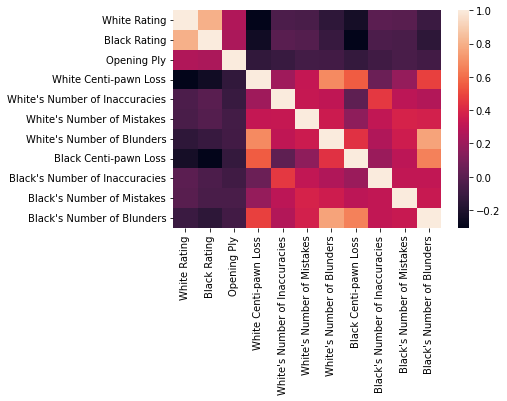

In [6]:
df_heatmap  = df.drop(columns=['Unnamed: 0', "Game ID", "Opening ECO"] , axis=1)
sns.heatmap(df_heatmap.corr())

<AxesSubplot:xlabel='White Rating', ylabel='Opening Ply'>

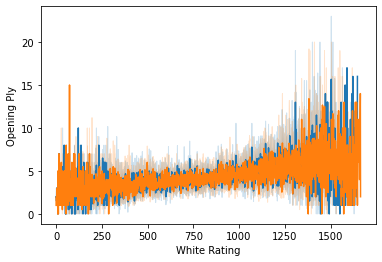

In [8]:
sns.lineplot(x="White Rating",
                    y="Opening Ply",
                    data=df)

sns.lineplot(x="Black Rating",
                   y="Opening Ply",
                    data=df)

<AxesSubplot:xlabel='Opening ECO', ylabel='Black Centi-pawn Loss'>

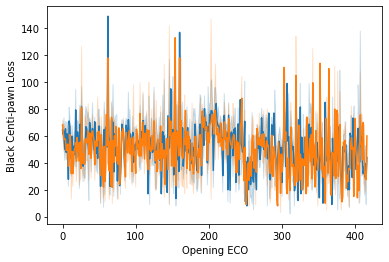

In [21]:
#sns.scatterplot(data=df, x="Opening ECO", y="White Centi-pawn Loss", size="White Rating", legend=False, sizes=(2, 10))
sns.lineplot(data=df, x="Opening ECO", y="Black Centi-pawn Loss",)
sns.lineplot(data=df, x="Opening ECO", y="White Centi-pawn Loss",)



In [9]:
x = df.drop(['White Rating', 'Opening ECO', 'Game ID', 'Unnamed: 0', "Opening Ply", 'Black Centi-pawn Loss', "Black's Number of Mistakes", "Black's Number of Blunders", "Black's Number of Inaccuracies"  ], axis = 1) # we will use all columns except 'White Rating"
y = df['White Rating'] # this is our target value
x.shape, y.shape
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18637 entries, 0 to 18636
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Black Rating                    18637 non-null  int64
 1   White Centi-pawn Loss           18637 non-null  int64
 2   White's Number of Inaccuracies  18637 non-null  int64
 3   White's Number of Mistakes      18637 non-null  int64
 4   White's Number of Blunders      18637 non-null  int64
dtypes: int64(5)
memory usage: 873.6 KB
None


In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.80)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((3727, 5), (14910, 5), (3727,), (14910,))

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() # initialize our model

from sklearn.metrics import accuracy_score
from sklearn import tree
model.fit(xtrain, ytrain)
y_predictions = model.predict(xtest)
accuracy_score(y_predictions, ytest)

0.003957075788061704

[Text(0.47485108980789187, 0.9838709677419355, 'X[0] <= 781.5\ngini = 0.999\nsamples = 3727\nvalue = [1, 1, 1 ... 1, 1, 1]'),
 Text(0.2354968540859811, 0.9516129032258065, 'X[0] <= 552.5\ngini = 0.998\nsamples = 1618\nvalue = [1, 1, 1 ... 0, 0, 0]'),
 Text(0.1385078092853516, 0.9193548387096774, 'X[0] <= 469.5\ngini = 0.997\nsamples = 713\nvalue = [0, 1, 1 ... 0, 0, 0]'),
 Text(0.11758266893684718, 0.8870967741935484, 'X[1] <= 211.0\ngini = 0.996\nsamples = 487\nvalue = [0, 1, 1 ... 0, 0, 0]'),
 Text(0.10048578978556308, 0.8548387096774194, 'X[4] <= 7.5\ngini = 0.996\nsamples = 478\nvalue = [0, 1, 1 ... 0, 0, 0]'),
 Text(0.06849267769358523, 0.8225806451612904, 'X[0] <= 387.5\ngini = 0.996\nsamples = 462\nvalue = [0, 1, 1 ... 0, 0, 0]'),
 Text(0.036614684041074146, 0.7903225806451613, 'X[0] <= 105.0\ngini = 0.995\nsamples = 307\nvalue = [0, 1, 1 ... 0, 0, 0]'),
 Text(0.0020035049875583256, 0.7580645161290323, 'X[0] <= 92.5\ngini = 0.961\nsamples = 31\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 

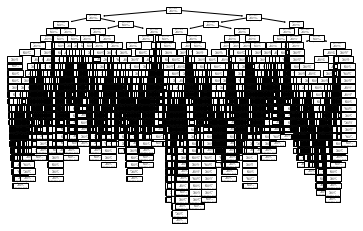

In [15]:
tree.plot_tree(model)

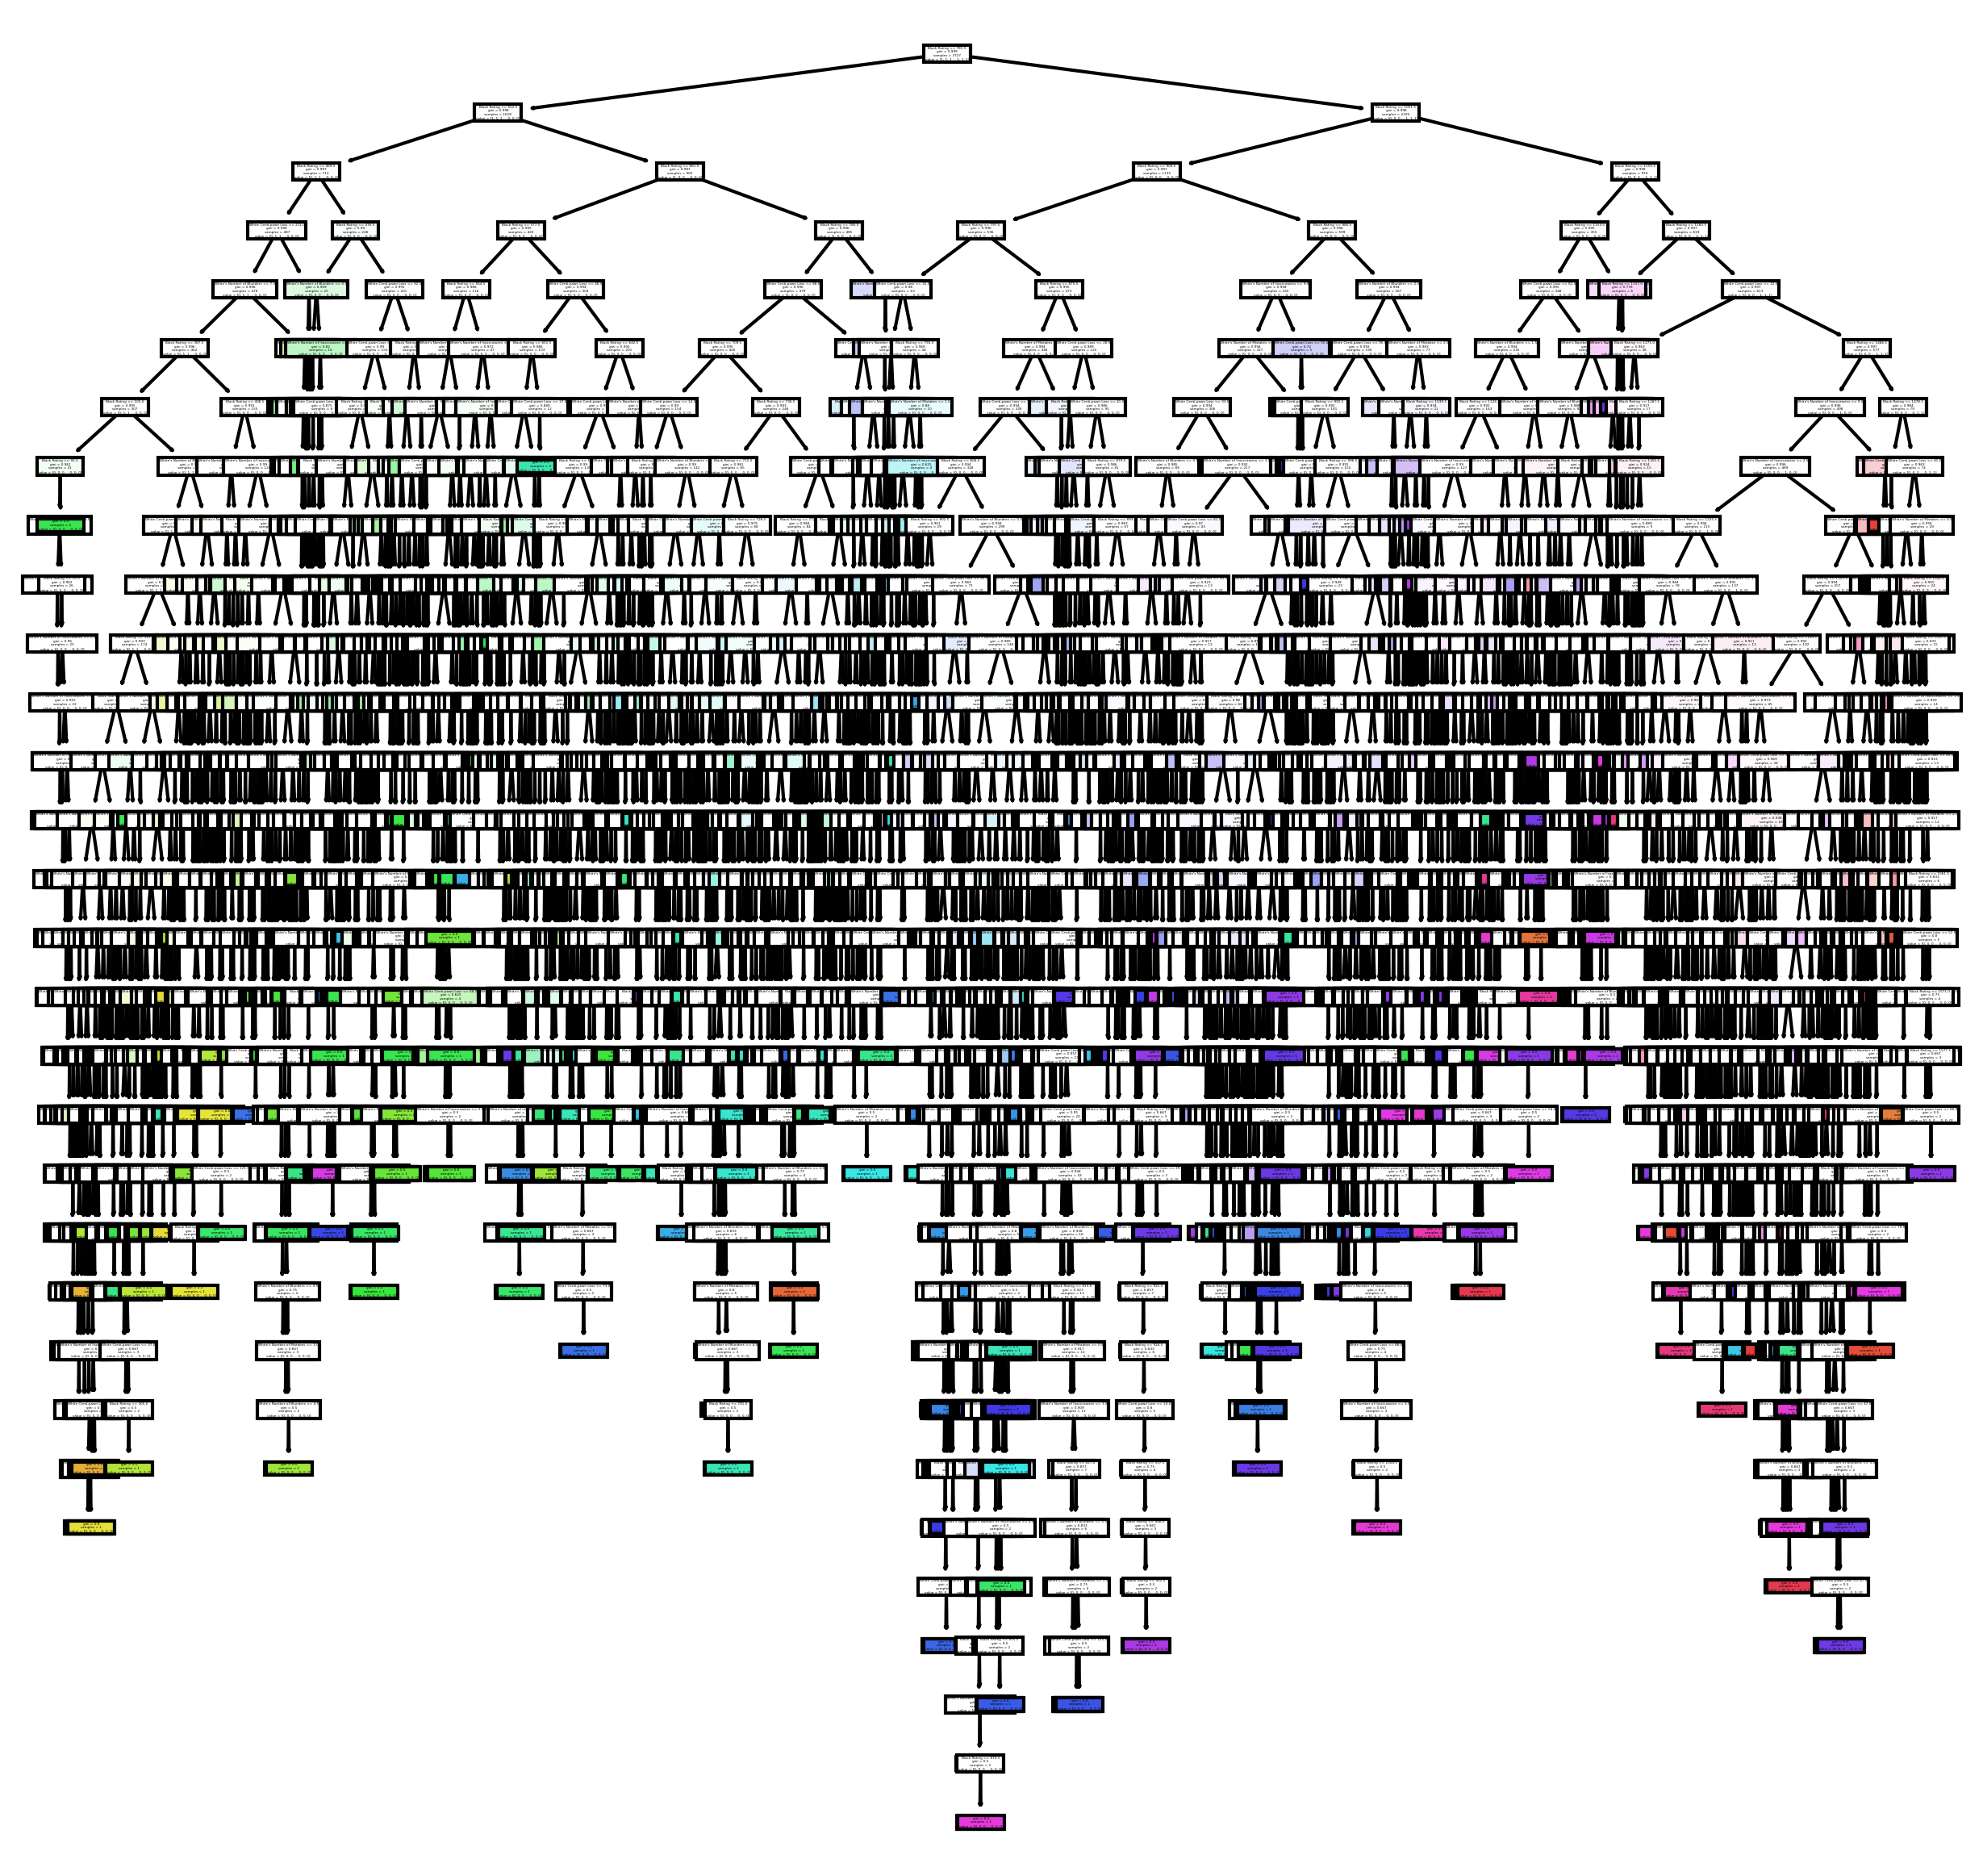

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model, feature_names = x.columns, filled=True);

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(ytest, y_predictions)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
print(classification_report(ytest, y_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00    

/home/w0wqqq/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/w0wqqq/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/w0wqqq/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/w0wqqq/.local/lib/python3.10/site-packa